In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("runtime_analysis/times-laptop.csv")
# to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.head(15)

,nmax,original,numpy,numba,numba-parallel-12t,cython-1t,cython-parallel-12t,cython-abstracted-parallel-12t,mpi-6p,mpi-6p-2t,cpp-1t,cpp-parallel-12t,cpp-python-12t,cpp-abstracted-python-12t
0,10,0.065745,0.048319,0.250971,1.615257,0.008764,0.045269,0.047503,0.034181,0.017249,0.002090,0.032340,0.022079,0.017018
1,50,1.689366,1.117696,0.401228,1.516188,0.264541,0.055604,0.060693,0.725380,0.035986,0.024656,0.039198,0.030421,0.021465
2,100,6.422947,4.003772,0.862036,1.685943,0.692842,0.071353,0.084618,2.836231,0.080723,0.071383,0.049455,0.047033,0.032498
3,250,41.954523,27.187244,3.882899,1.851741,4.317352,0.207260,0.210686,17.545963,0.359353,0.429073,0.109211,0.154252,0.100150
4,500,172.723372,111.263184,15.959958,3.046434,19.457416,0.663130,0.664814,75.077783,1.316774,1.515524,0.355045,0.575085,0.336249
5,750,393.933854,260.112987,37.876716,5.169758,42.845519,1.573325,1.605326,161.275866,2.657661,3.516170,0.760912,1.192201,0.773164
6,1000,635.109735,411.498215,56.614571,7.856761,74.592638,2.289637,2.287715,284.262732,4.707283,6.238607,1.239828,2.106910,1.272801
7,2000,NaN,NaN,280.535773,27.940301,339.904213,9.650063,9.597011,NaN,17.948936,35.489955,5.579894,8.957985,5.681960
8,4000,NaN,NaN,NaN,122.468251,NaN,43.285150,40.706327,NaN,80.540879,162.555403,24.374356,37.838899,25.197092
9,5000,NaN,NaN,NaN,184.154435,NaN,80.147435,78.693115,NaN,131.241519,269.772087,42.705966,62.904398,40.671222


Predicted time for nmax=1000: 661.0965356477478


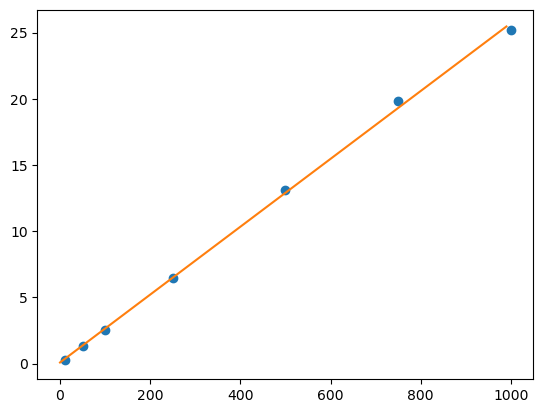

In [34]:
x = df["nmax"][:7]
y = np.sqrt(df["original"][:7])

# NumPy polyfit
p = np.polyfit(x, y, 1)
xVals = np.arange(0, 1000, 10)
yVals = p[0]*xVals + p[1]

plt.plot(x, y, 'o', label='Original')
plt.plot(xVals, yVals, label='Fit')

N = df["nmax"][6]
predicted = np.square(p[0]*N + p[1])
print(f"Predicted time for nmax={N}: {predicted}")

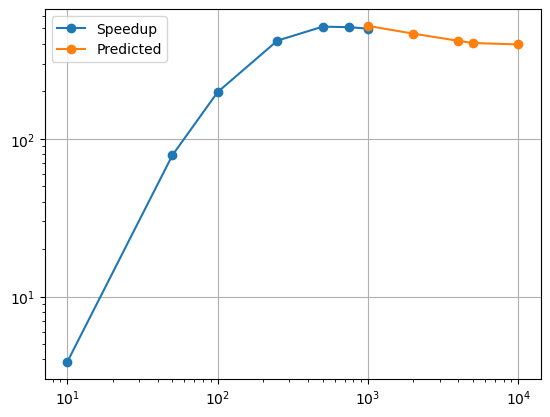

In [43]:
speedup = df["original"] / df["cpp-abstracted-python-12t"]
speedup_predicted = np.square(p[0]*df["nmax"] + p[1]) / df["cpp-abstracted-python-12t"]

plt.plot(df["nmax"][:7], speedup[:7], label='Speedup', marker='o')
plt.plot(df["nmax"][6:], speedup_predicted[6:], label='Predicted', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()